In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

(a)

Since all of three graph are undirected graphs. They are obviously irreducible. However, graph 1 is aperiodic since when $X_0 = 1, X_t = 3$ we can find that $\text{gcd}(t_1, t_2,...) = 2$ since we can reach it when $t = 2 + 2 k_1 + 10  k_2$ where $k_1$ refers to backward and forward times and $k_2$ refers to the number that walk through the whole circle. On the other hand, graph 2 is aperiodic because we can reach any note  after walking through a circle(We get $t = 9$). Then $t$ could be an odd number. If we walk backwawrd and forward, we can get $2 k_1$ time. We can find $t_1 = m, t_n = m + 2 k_1 + 9k_2$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly. Therefore, $\text{gcd}(t_1, t_2,...) = 1$. Graph 3 is aperiodic since we can always find $t_1 = m, t_n = m + 2 k_1 + 9k_2 + 4 k_3$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly and $k_3$ refers to the pure times of walking from node 1 to node 5.

(b)

In [2]:
def CreateP1():
    P = np.zeros((10,10))
    for i in range(10):
        P[i][i-1] = P[i][(i+1)%10] = 0.5
    return P

def CreateP2():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    return P

def CreateP3():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    P[0][4] = P[0][1] = P[0][-1] = 1/3
    P[4][0] = P[4][3] = P[4][5] = 1/3
    return P

def GetInitalState(num_state):
    D = np.zeros((1, num_state))
    D[0][0] = 1
    return D

def GetTV(D, PI):
    return 0.5 * np.sum(np.abs(D-PI))

# use pow iteration algorithm to get PI
def GetPI2():
    D2 = GetInitalState(9)
    P2 = CreateP2()
    for _ in range(10):
        P2 = P2 @ P2
    return D2 @ P2


def GetPI3():
    D3 = GetInitalState(9)
    P3 = CreateP3()
    for _ in range(10):
        P3 = P3 @ P3
    return D3 @ P3

In [3]:
D1 = GetInitalState(10)
P1 = CreateP1()
PI1 = np.ones((1,10)) / 10

D2 = GetInitalState(9)
P2 = CreateP2()
PI2 = GetPI2()

D3 = GetInitalState(9)
P3 = CreateP3()
PI3 = GetPI3()

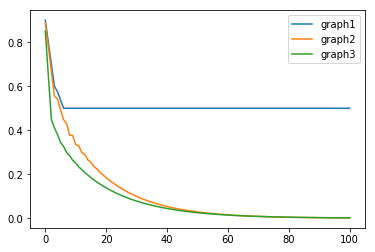

In [4]:
DT = np.zeros((101,3))

for t in range(101):
    DT[t][0] = GetTV(D1, PI1)
    DT[t][1] = GetTV(D2, PI2)
    DT[t][2] = GetTV(D3, PI3)
    D1 = D1 @ P1
    D2 = D2 @ P2
    D3 = D3 @ P3
    
T = np.arange(0,101)

plt.plot(T,DT[:,0])
plt.plot(T,DT[:,1])
plt.plot(T,DT[:,2])
plt.legend(['graph1', 'graph2', 'graph3'])
plt.show();

(c)

In [5]:
U1,S1,VT1 = np.linalg.svd(P1)
U2,S2,VT2 = np.linalg.svd(P2)
U3,S3,VT3 = np.linalg.svd(P3)
print('the second largest eigenvalue of the trainsition matrix')
print('graph1 = %6f'%S1[1]**2)
print('graph2 = %6f'%S2[1]**2)
print('graph3 = %6f'%S3[1]**2)

the second largest eigenvalue of the trainsition matrix
graph1 = 1.000000
graph2 = 0.883022
graph3 = 0.939282


(d)

From (b), we can find that DV of graph2 and graph3 converge to zero while DV of graph1 converges to $0.5$. From (c), we can find that the second largest eigenvalue of graph1 is one.

In [6]:
print('ratio of the second largest eigenvalue to the largest eigenvalue')
print('graph2 = %6f'% (S2[0]**2 / S2[1]**2))
print('graph3 = %6f'% (S3[0]**2 / S3[1]**2))

ratio of the second largest eigenvalue to the largest eigenvalue
graph2 = 1.132474
graph3 = 1.141281


Mathematically, the "time until we are close to $\pi$" is known as the mixing time of the chain, and is defined as the minimum time $t$ s.t. no matther where we start(i.e. for all states $s$), the distance between $D(t,s)$ and $\pi$ is at most $\frac{1}{4}$. From the ratio result above, we can find that the larger ratio of eigenvalue, the faster convergence speed the graph has. This link mixing time with power iteration algorithm since the ratio value $\frac{\lambda_{1}}{\lambda_{2}}$ determins the requisite iteration number to find the first eigenvalue(when initial vector is chosen randomly). Although the initial state $v$ is not chosen randomly, it illusrates that in most setting, the ratio between the two largest eigenvalues of a transition matrix roughly correspond to the rate at which $vP^T$ converges to $\pi$